In [22]:
import pandas as pd
import numpy as np
import plotly.express as px
import xgboost as xgb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [23]:
pd.set_option('display.max_columns', None)

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/house_pricing.csv')
df.head()

,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,Residential,2,1,836,138159.85
1,SACRAMENTO,Residential,3,1,1167,167541.46
2,SACRAMENTO,Residential,2,1,796,119095.12
3,SACRAMENTO,Residential,2,1,852,130904.95
4,SACRAMENTO,Residential,2,1,797,120266.19


In [25]:
print(df.columns.tolist())

['City', 'Type', 'Beds', 'Baths', 'SquareFeet', 'Price']


In [26]:
X = df[['Beds','Baths','SquareFeet']]
y  = df['Price'] 

In [27]:
data_matrix = xgb.DMatrix(X,y)

In [28]:
params = {
    'learning_rate' : .01,
    'max_depth' : 5,
    'alpha' : 10,
}

results = xgb.cv(
    params,
    data_matrix,
    num_boost_round=50,
    early_stopping_rounds=5,
    metrics=['rmse'],
)
results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,256239.541667,2333.818894,256206.864583,4700.046025
1,253795.567708,2308.396589,253766.317708,4629.851128
2,251376.614583,2283.129953,251351.083333,4560.583114
3,248982.203125,2258.194566,248960.416667,4491.814223
4,246612.130208,2233.558082,246593.984375,4423.541007
5,244266.510417,2208.985082,244252.484375,4356.363972
6,241944.416667,2184.991437,241946.661458,4298.449814
7,239646.161458,2161.119193,239652.473958,4232.132304
8,237370.489583,2136.550287,237410.343750,4152.530711
9,235118.000000,2112.236505,235191.187500,4073.368583


In [29]:
grid_params = [
    (max_depth, learning_rate, alpha)
    for max_depth in range(5,20,5)
    for learning_rate in [.01,.1,.5]
    for alpha in range(0,50,5)
]

min_rmse = float('inf')
best_params = None

for max_depth,learning_rate,alpha in grid_params:
    params = {
        'max_depth' : max_depth,
        'learning_rate' : learning_rate,
        'alpha' : alpha,
    }
    results = xgb.cv(
        params,
        data_matrix,
        num_boost_round=500,
        early_stopping_rounds=5,
        metrics='rmse',
    )
    current_rmse = results['test-rmse-mean'].min()
    if current_rmse < min_rmse:
        min_rmse = current_rmse
        best_params = (max_depth,learning_rate,alpha)
        print(f'Current best params: {best_params}')

Current best params: (5, 0.01, 0)
Current best params: (5, 0.01, 5)
Current best params: (5, 0.01, 20)
Current best params: (5, 0.01, 40)
Current best params: (5, 0.5, 0)
Current best params: (5, 0.5, 5)
Current best params: (5, 0.5, 10)
Current best params: (5, 0.5, 15)
Current best params: (5, 0.5, 20)
Current best params: (5, 0.5, 25)
Current best params: (5, 0.5, 30)
Current best params: (5, 0.5, 35)
Current best params: (5, 0.5, 40)
Current best params: (5, 0.5, 45)


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=.3,random_state=1234)

In [32]:
train_matrix = xgb.DMatrix(xtrain,ytrain)
test_matrix = xgb.DMatrix(xtest,ytest)

In [33]:
model = xgb.train(
    params,
    train_matrix,
    num_boost_round=500,
    early_stopping_rounds=5,
    evals=[(test_matrix,'test')],
)
model.save_model('khouse_pricing.xgb')

[0]	test-rmse:128478.05469
[1]	test-rmse:72552.41406
[2]	test-rmse:50759.97656
[3]	test-rmse:45224.83984
[4]	test-rmse:44384.85938
[5]	test-rmse:44402.20703
[6]	test-rmse:45123.16016
[7]	test-rmse:46184.93750
[8]	test-rmse:46765.59766


In [34]:
saved_model = xgb.Booster()
saved_model.load_model('khouse_pricing.xgb')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

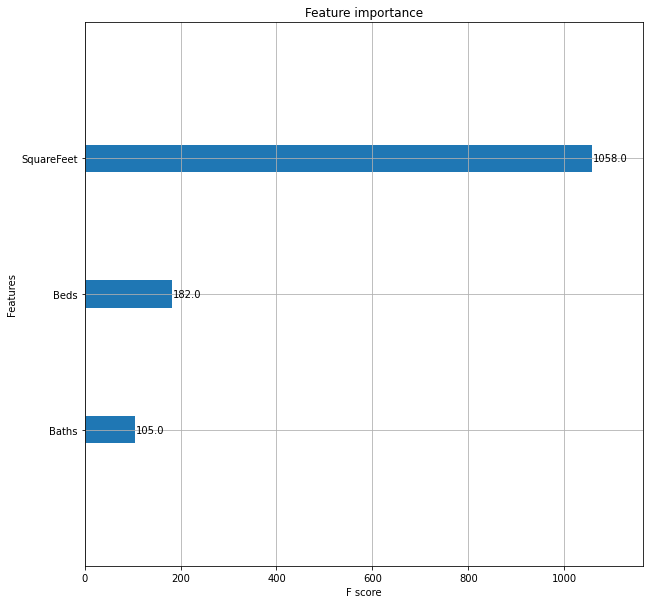

In [35]:
f,a = plt.subplots(figsize=(10,10))
xgb.plot_importance(model,ax=a)